In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as sc
import yfinance as yf
import pandas_datareader as pdr 
yf.pdr_override()


[*********************100%***********************]  3 of 3 completed


<AxesSubplot:xlabel='Date'>

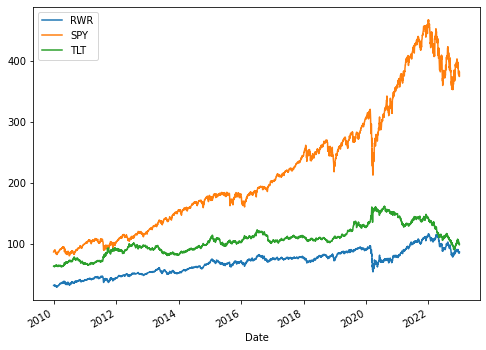

In [16]:
tickers_list = ['SPY', 'TLT', 'RWR']
df = yf.download(tickers_list, start='2010-1-1', end='2022-12-30')['Adj Close']
df.plot(figsize=(8,6))

<AxesSubplot:xlabel='Date'>

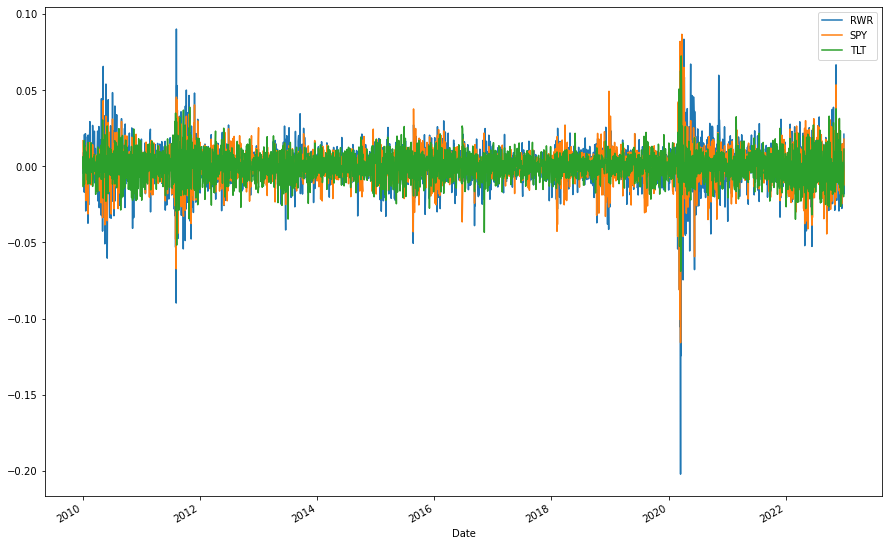

In [17]:
daily_returns_df = np.log(df/df.shift(1))
daily_returns_df.plot(figsize=(15,10))

In [18]:
daily_returns_df = np.log(df/df.shift(1))

In [19]:
daily_returns_df

,RWR,SPY,TLT
Date,,,
2009-12-31,NaN,NaN,NaN
2010-01-04,-0.004480,0.016817,-0.000890
2010-01-05,0.000816,0.002644,0.006438
2010-01-06,-0.000612,0.000704,-0.013477
2010-01-07,0.009142,0.004213,0.001680
...,...,...,...
2022-12-22,-0.004258,-0.014369,-0.000193
2022-12-23,0.008385,0.005736,-0.014769
2022-12-27,-0.000229,-0.003951,-0.019971


In [20]:
daily_returns_df.describe()

,RWR,SPY,TLT
count,3271.000000,3271.000000,3271.000000
mean,0.000309,0.000454,0.000139
std,0.013862,0.011132,0.009510
min,-0.202247,-0.115887,-0.069010
25%,-0.005634,-0.003738,-0.005486
50%,0.000929,0.000655,0.000563
75%,0.007123,0.005736,0.005753
max,0.090170,0.086731,0.072502


C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9224/3260333680.py:17: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9224/3260333680.py:19: MatplotlibDeprecationWarning: 
The is_last_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_col() instead.
  if ax.is_last_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9224/3260333680.py:21: MatplotlibDeprecationWarning: 
The is_first_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_row() instead.
  if ax.is_first_row():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9224/3260333680.py:23: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and wil

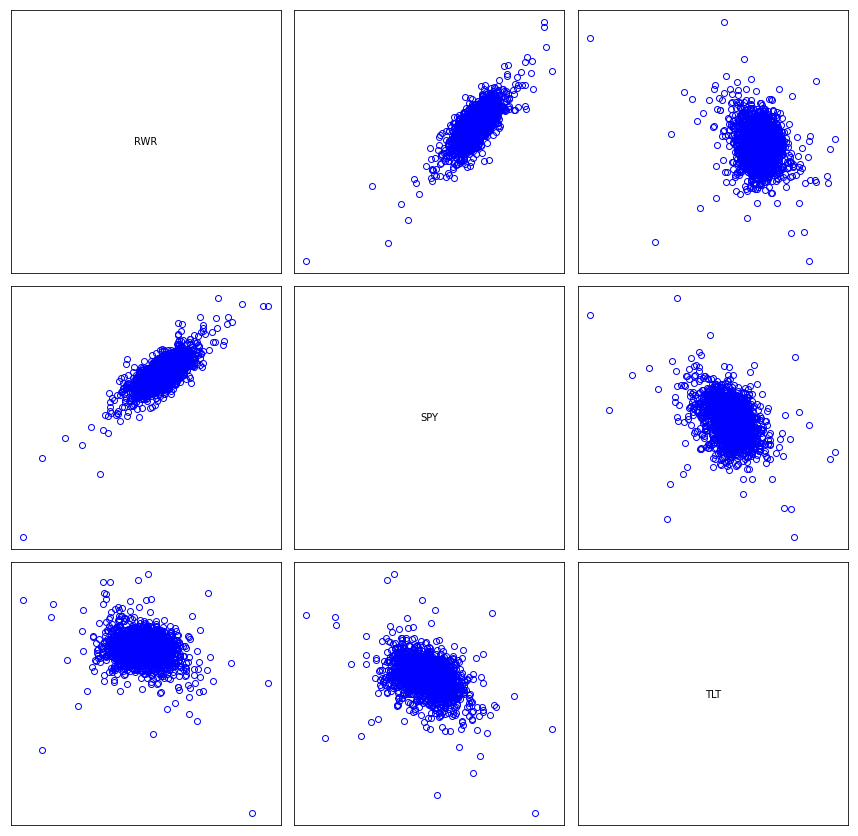

In [24]:
fig = scatterplot_matrix(daily_returns_df, list(daily_returns_df.columns), linestyle='none', marker='o', color='blue', mfc='none')


In [22]:
def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numdata, ncols=numdata, figsize=(15,15))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data.iloc[:,x], data.iloc[:,y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    # for i, j in zip(range(numdata), itertools.cycle((-1, 0))):
    #     print(i, j)
    #     axes[j,i].xaxis.set_visible(True)
    #     axes[i,j].yaxis.set_visible(True)

    return fig   

In [25]:
mvnorm = sc.multivariate_normal(mean=[0, 0], cov=[[1., 0.5], 
                                                     [0.5, 1.]])
x = mvnorm.rvs(10000)

In [26]:
from statsmodels.distributions.empirical_distribution import ECDF


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'stat_func'
  cset = contour_func(


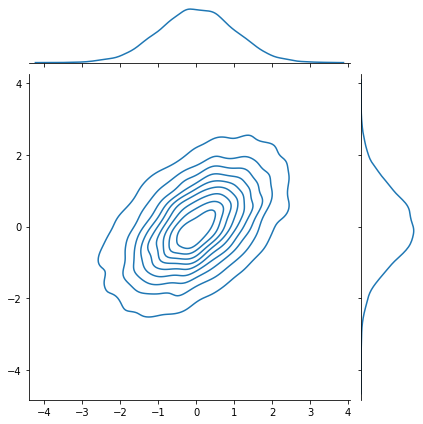

In [27]:
sb.jointplot(x[:, 0], x[:, 1], kind='kde', stat_func=None)


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


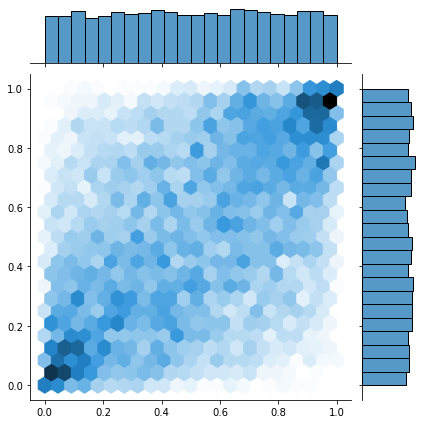

In [30]:
x_unif = sc.norm.cdf(x)
sb.jointplot(x_unif[:, 0], x_unif[:, 1], kind='hex')

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

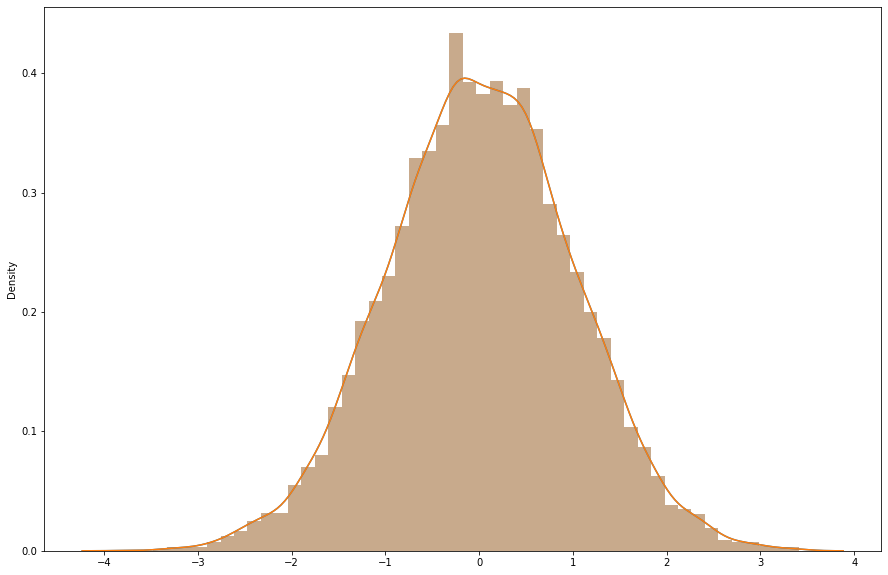

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
sb.distplot(sc.norm.ppf(x_unif[:,0]), ax=ax)
sb.distplot(x[:, 0], ax=ax)

In [33]:
from copulas.multivariate import GaussianMultivariate

copula = GaussianMultivariate()
copula.fit(x)

C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


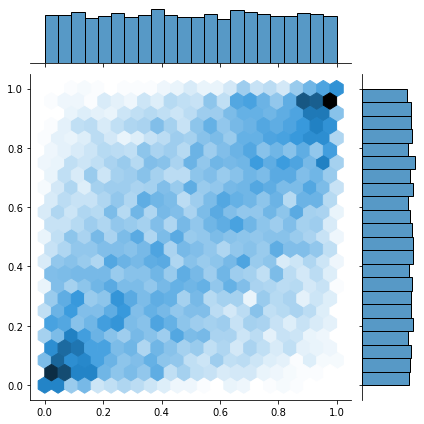

In [35]:
x1 = copula.univariates[0].cdf(x[:,0])
x2 = copula.univariates[1].cdf(x[:,1])
sb.jointplot(x1, x2, kind='hex')

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

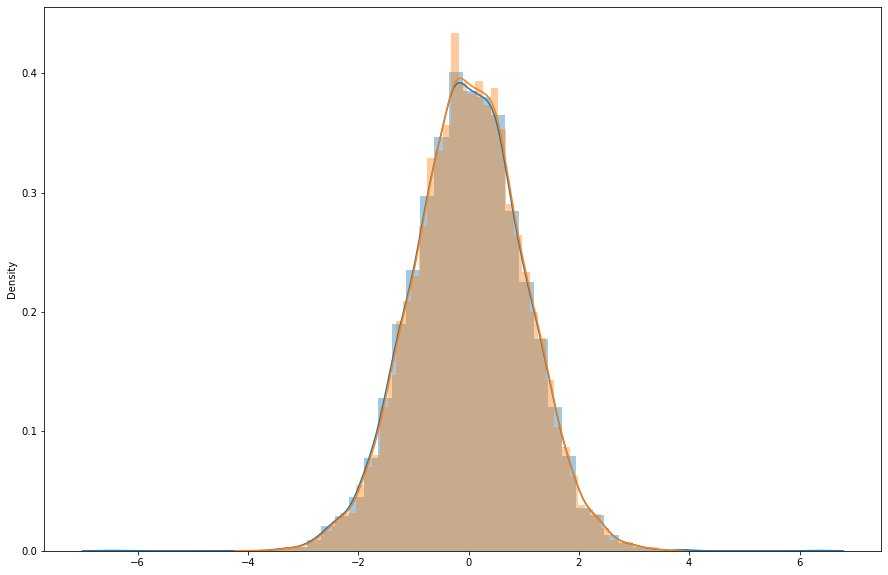

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
sb.distplot(sc.norm.ppf(x1), ax=ax)
sb.distplot(x[:, 0], ax=ax)

In [42]:
copula = GaussianMultivariate()
copula.fit(daily_returns_df)

marginal_cdfs = {}
for i, j in enumerate(daily_returns_df.columns):
    marginal = copula.univariates[i].cdf(daily_returns_df.iloc[:,i])
    marginal_cdfs[j] = marginal
marginal_cdfs_df = pd.DataFrame.from_dict(marginal_cdfs)
marginal_cdfs_df

C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
C:\Users\jahan laptop\anaconda3\lib\site-packages\copulas\univariate\truncated_gaussian.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  a = (self.min - loc) / scale
C:\Users\jahan 

,RWR,SPY,TLT
0,0.296908,0.949662,0.437872
1,0.497409,0.597912,0.769532
2,0.438668,0.488279,0.072720
3,0.801731,0.678585,0.558770
4,0.173894,0.634065,0.457920
...,...,...,...
3266,0.304016,0.054495,0.469576
3267,0.780248,0.745486,0.056746
3268,0.454272,0.253268,0.019481
3269,0.066220,0.069573,0.240217


In [39]:
daily_returns_df.isnull().sum()

RWR    1
SPY    1
TLT    1
dtype: int64

In [41]:
daily_returns_df=daily_returns_df.dropna()

In [45]:
copula.univariates[1].cdf(1)


0.9999982575796666

In [46]:
copula.covariance


,RWR,SPY,TLT
RWR,1.000000,0.690799,-0.141356
SPY,0.690799,1.000000,-0.363046
TLT,-0.141356,-0.363046,1.000000


C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9224/3260333680.py:17: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9224/3260333680.py:19: MatplotlibDeprecationWarning: 
The is_last_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_col() instead.
  if ax.is_last_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9224/3260333680.py:21: MatplotlibDeprecationWarning: 
The is_first_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_row() instead.
  if ax.is_first_row():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_9224/3260333680.py:23: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and wil

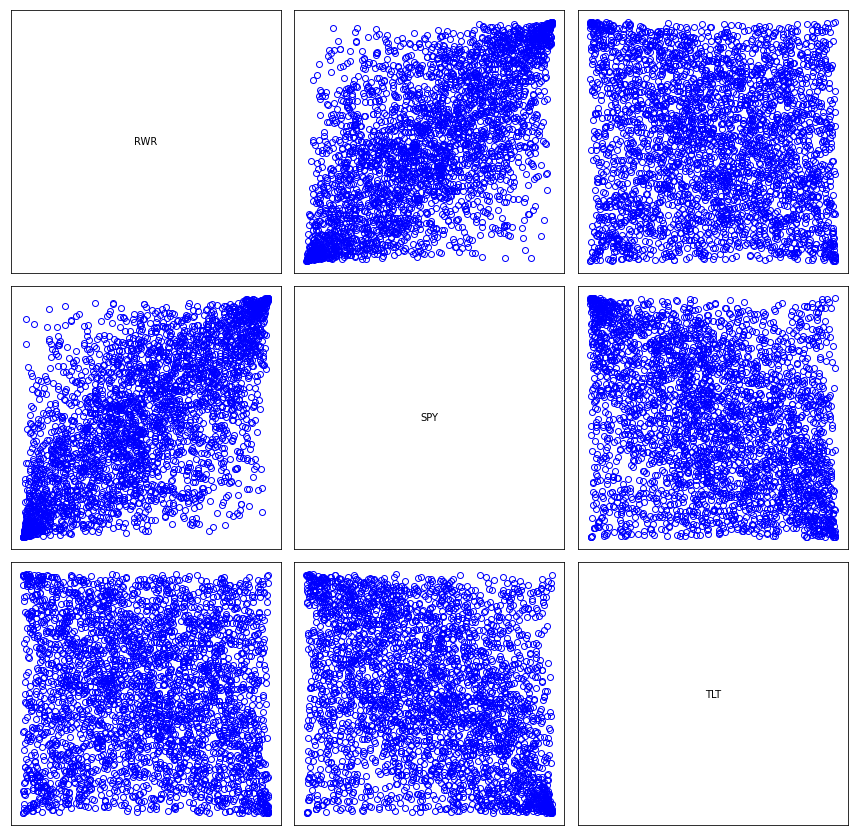

In [48]:
fig = scatterplot_matrix(marginal_cdfs_df, list(daily_returns_df.columns), linestyle='none', marker='o', color='blue', mfc='none')


<AxesSubplot:ylabel='RWR'>

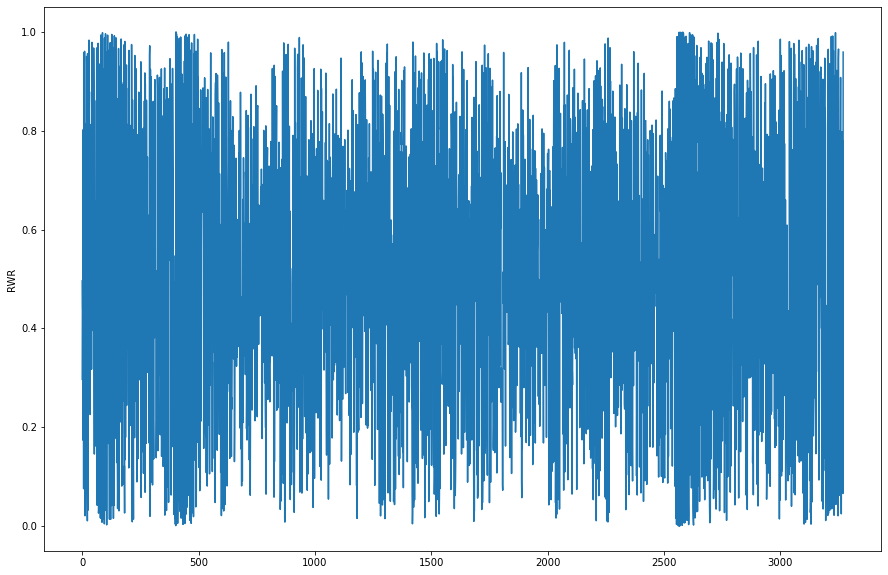

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
sb.lineplot(data=marginal_cdfs_df.iloc[:,0], ax=ax)

In [51]:
sc.norm.ppf(marginal_cdfs_df.iloc[:,0])


array([-0.53331476, -0.00649469, -0.15434816, ..., -0.11487609,
       -1.50454989,  1.73961564])

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

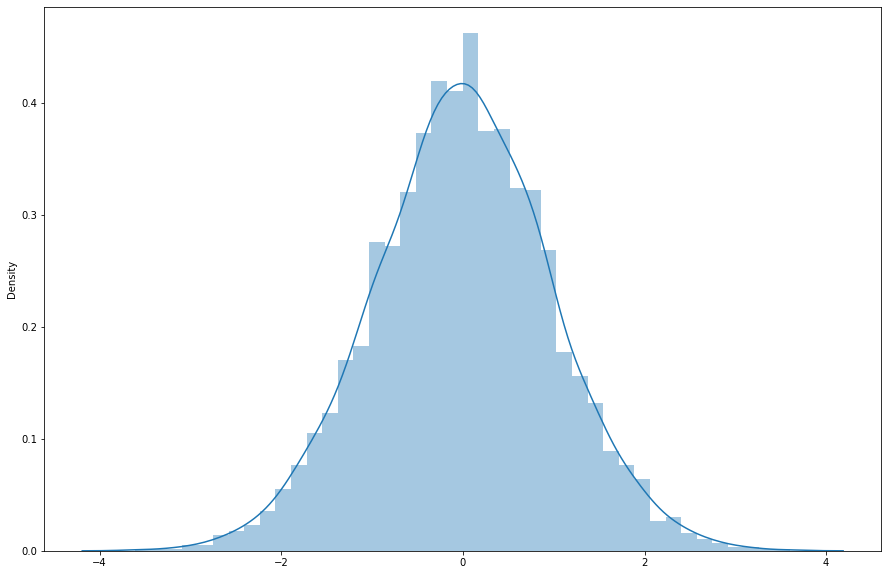

In [52]:
fig, ax = plt.subplots(figsize=(15,10))
sb.distplot(sc.norm.ppf(marginal_cdfs_df.iloc[:,0]), ax=ax)

<AxesSubplot:>

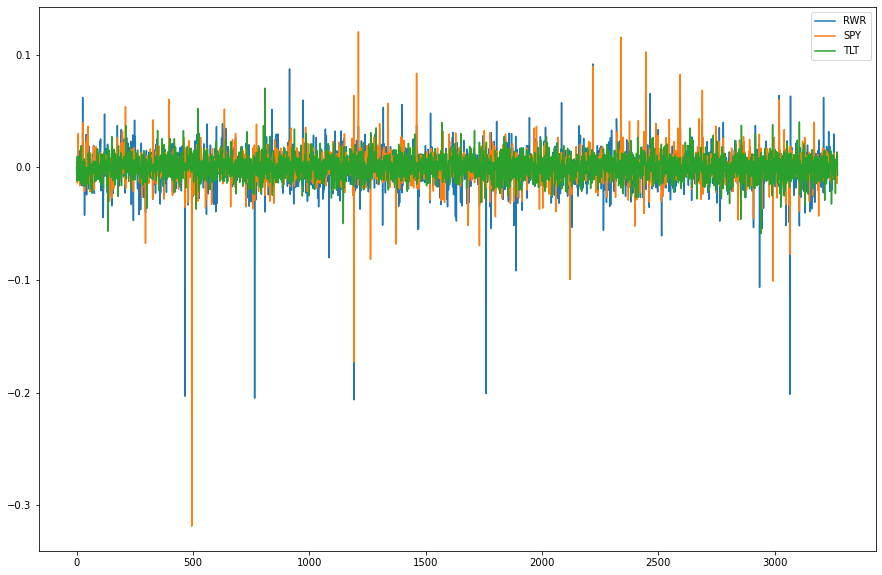

In [53]:
synthetic = copula.sample(len(marginal_cdfs_df))
synthetic.plot(figsize=(15,10))

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


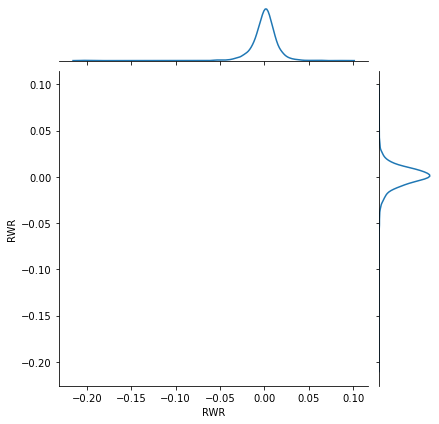

In [55]:
sb.jointplot(synthetic.iloc[:,0], daily_returns_df.iloc[:, 0], kind='kde')


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RWR', ylabel='Density'>

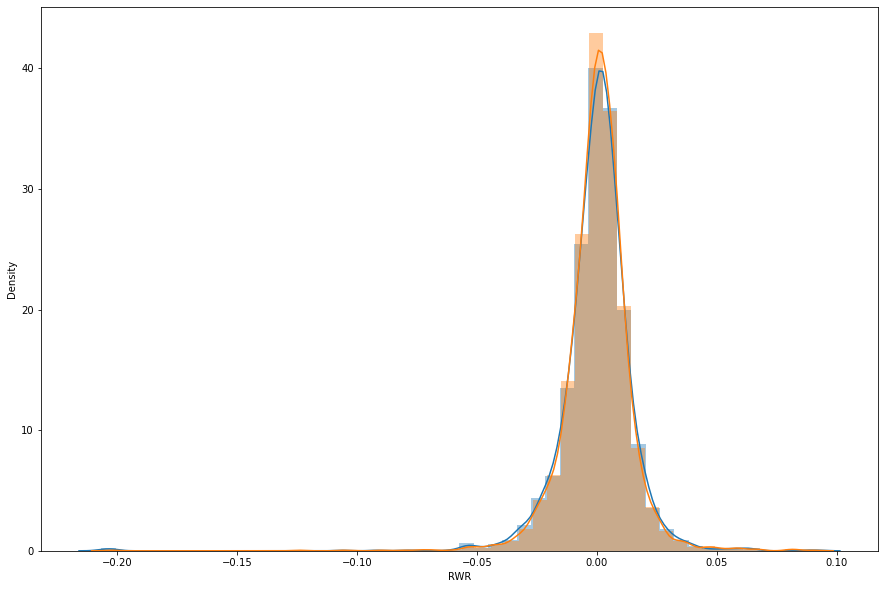

In [56]:
fig, ax = plt.subplots(figsize=(15,10))
sb.distplot(synthetic.iloc[:,0], ax=ax)
sb.distplot(daily_returns_df.iloc[:, 0], ax=ax)

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SPY', ylabel='Density'>

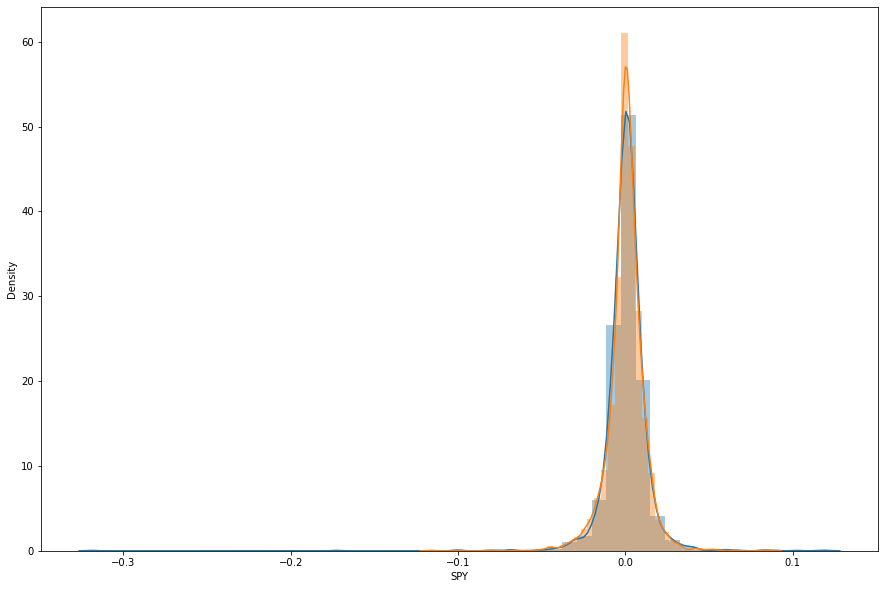

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
sb.distplot(synthetic.iloc[:,1], ax=ax)
sb.distplot(daily_returns_df.iloc[:, 1], ax=ax)

In [58]:
from copulae import StudentCopula

copula_t = StudentCopula(dim=len(daily_returns_df.columns))
copula_t.fit(data=daily_returns_df)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
C:\Users\jahan laptop\anaconda3\lib\site-packages\copulae\stats\_multivariate_t.py:116: RuntimeWarning: overflow encountered in power
  c = np.diag(1 + (x_us @ la.inv(cov) @ x_us.T) / df) ** ((dim + df) / 2)
C:\Users\jahan laptop\anaconda3\lib\site-packages\copulae\stats\_multivariate_t.py:79: RuntimeWarning: divide by zero encountered in log
  return np.log(cls.pdf(x, mean, cov, df))


               RWR          SPY          TLT
count  3271.000000  3271.000000  3271.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


In [59]:
copula_t.summary()


1.000000,0.667439,-0.108988
0.667439,1.000000,-0.362785
-0.108988,-0.362785,1.000000


In [60]:
from copulae.stats import multivariate_t as mvt, t
copula_t_synthetic = mvt.rvs(cov=copula_t.sigma, df=copula_t._df, size=len(daily_returns_df))
copula_t_synthetic = pd.DataFrame(copula_t_synthetic)

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RWR', ylabel='Density'>

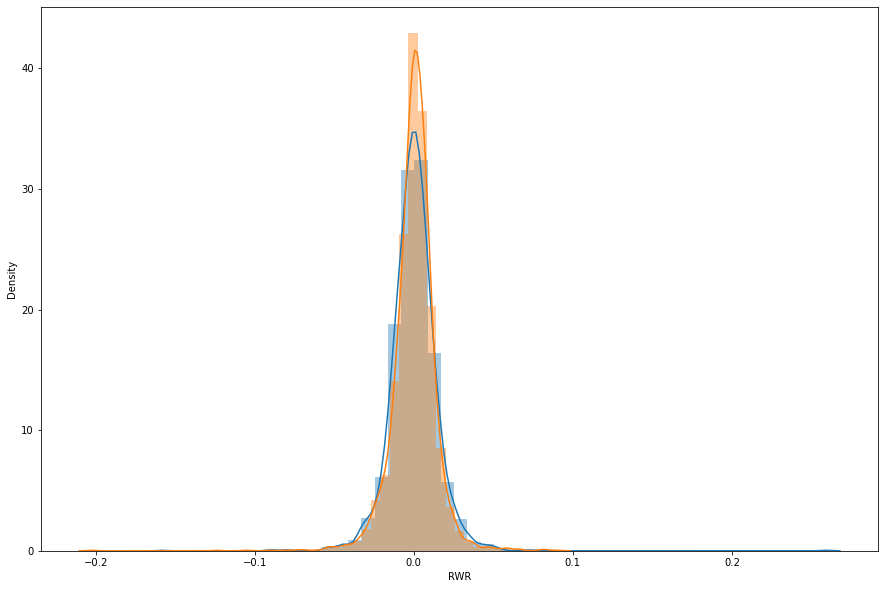

In [62]:
fig, ax = plt.subplots(figsize=(15,10))
sb.distplot(copula_t_synthetic.iloc[:,0] / 100, ax=ax)
sb.distplot(daily_returns_df.iloc[:,0], ax=ax)

In [63]:
copula_t_synthetic.columns = daily_returns_df.columns


In [64]:
#weights = [1/len(synthetic.columns) for i in range(0, len(synthetic.columns))]
weights = [20, 30, 50]
daily_portfolio_returns_df = daily_returns_df * weights
daily_portfolio_returns_df['portfolio_ret'] = daily_portfolio_returns_df.sum(axis=1)

In [65]:
daily_portfolio_returns_df

,RWR,SPY,TLT,portfolio_ret
Date,,,,
2010-01-04,-0.089606,0.504516,-0.044506,0.370404
2010-01-05,0.016314,0.079318,0.321877,0.417509
2010-01-06,-0.012240,0.021109,-0.673840,-0.664971
2010-01-07,0.182838,0.126376,0.083983,0.393198
2010-01-08,-0.186913,0.099669,-0.022340,-0.109584
...,...,...,...,...
2022-12-22,-0.085169,-0.431067,-0.009643,-0.525879
2022-12-23,0.167692,0.172075,-0.738449,-0.398683
2022-12-27,-0.004575,-0.118538,-0.998555,-1.121668


<AxesSubplot:xlabel='Date'>

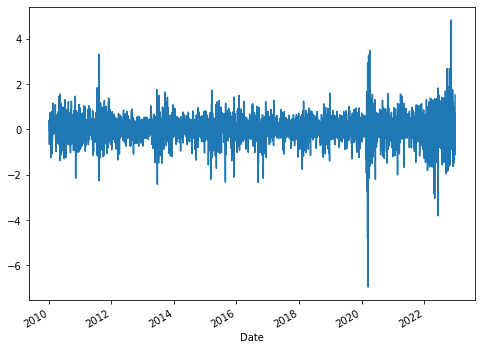

In [67]:
daily_portfolio_returns_df['portfolio_ret'].plot(figsize=(8,6))

In [68]:
daily_portfolio_returns_df['portfolio_ret'].describe()

count    3271.000000
mean        0.026737
std         0.621709
min        -6.951628
25%        -0.273147
50%         0.066855
75%         0.365227
max         4.825609
Name: portfolio_ret, dtype: float64

<AxesSubplot:xlabel='Date'>

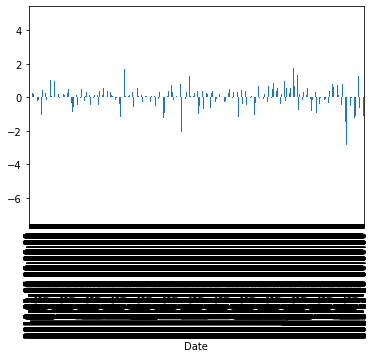

In [69]:
daily_portfolio_returns_df['portfolio_ret'].plot(kind='bar')

In [70]:
portfolio_returns_df = synthetic * weights
portfolio_returns_df['portfolio_ret'] = portfolio_returns_df.sum(axis=1)

In [71]:
copula_portfolio_VaR = portfolio_returns_df.quantile(0.1)['portfolio_ret']
copula_portfolio_CVaR = np.mean(portfolio_returns_df['portfolio_ret'][portfolio_returns_df['portfolio_ret'] < - copula_portfolio_VaR])
print('Portfolio copula VaR', copula_portfolio_VaR * 100, 'CVaR', copula_portfolio_CVaR * 100)

Portfolio copula VaR -73.43505239426858 CVaR -10.637440251720461


In [72]:
portfolio_returns_df

,RWR,SPY,TLT,portfolio_ret
0,-0.044319,0.150123,0.011475,0.117279
1,-0.040361,-0.245820,-0.586692,-0.872874
2,-0.116014,0.026997,-0.167884,-0.256901
3,-0.234376,-0.415606,0.482493,-0.167488
4,-0.019888,-0.019848,0.136724,0.096988
...,...,...,...,...
3266,-0.054778,-0.191448,-0.054949,-0.301175
3267,-0.136910,-0.427990,0.248925,-0.315975
3268,0.254104,-0.020715,0.685609,0.918998
3269,0.012794,0.197640,0.262163,0.472597


In [73]:
copula_portfolio_VaR = portfolio_returns_df.quantile(0.1)['portfolio_ret']


In [74]:
copula_portfolio_VaR

-0.7343505239426859

In [76]:
covariance = daily_returns_df.cov()
mean_vec = daily_returns_df.mean(axis=0)
norm_synthetic = pd.DataFrame(sc.multivariate_normal.rvs(mean_vec, covariance, size=100))
portfolio_norm_returns_df = norm_synthetic * weights
portfolio_norm_returns_df['portfolio_ret'] = portfolio_norm_returns_df.sum(axis=1)

norm_portfolio_VaR = portfolio_norm_returns_df.quantile(0.1)['portfolio_ret']
norm_portfolio_CVaR = np.mean(portfolio_norm_returns_df['portfolio_ret'][portfolio_norm_returns_df['portfolio_ret'] < - norm_portfolio_VaR])
print('Portfolio normal VaR', norm_portfolio_VaR * 100, 'CVaR', norm_portfolio_CVaR * 100)

Portfolio normal VaR -103.36760503416772 CVaR -22.439551099797026


In [77]:
norm_portfolio_VaR = portfolio_norm_returns_df.quantile(0.1)['portfolio_ret']


In [78]:
norm_portfolio_VaR

-1.0336760503416773

In [79]:
portfolio_t_returns_df = copula_t_synthetic * weights
portfolio_t_returns_df['portfolio_ret'] = portfolio_t_returns_df.sum(axis=1)

In [80]:
portfolio_t_returns_df.head()


,RWR,SPY,TLT,portfolio_ret
0,-0.305440,35.978233,-67.710145,-32.037351
1,-36.457897,-48.508682,109.851600,24.885021
2,14.563576,38.896741,47.926117,101.386434
3,-30.670868,-119.511362,169.002521,18.820292
4,12.381227,-4.532841,61.523520,69.371905


In [81]:
copula_t_portfolio_VaR = portfolio_t_returns_df.quantile(0.1)['portfolio_ret']
copula_t_portfolio_CVaR = np.mean(portfolio_t_returns_df['portfolio_ret'][portfolio_t_returns_df['portfolio_ret'] < - copula_t_portfolio_VaR])
print('Portfolio copula t VaR', copula_t_portfolio_VaR, 'CVaR', copula_t_portfolio_CVaR)

Portfolio copula t VaR -88.86121893563372 CVaR -18.267915432620875


In [82]:
copula_t_portfolio_VaR

-88.86121893563372

In [83]:
copula_t_portfolio_VaR = portfolio_t_returns_df.quantile(0.1)['portfolio_ret']


In [84]:
copula_t_portfolio_VaR

-88.86121893563372

Text(0.5, 1.0, 't-Student Copula Samples')

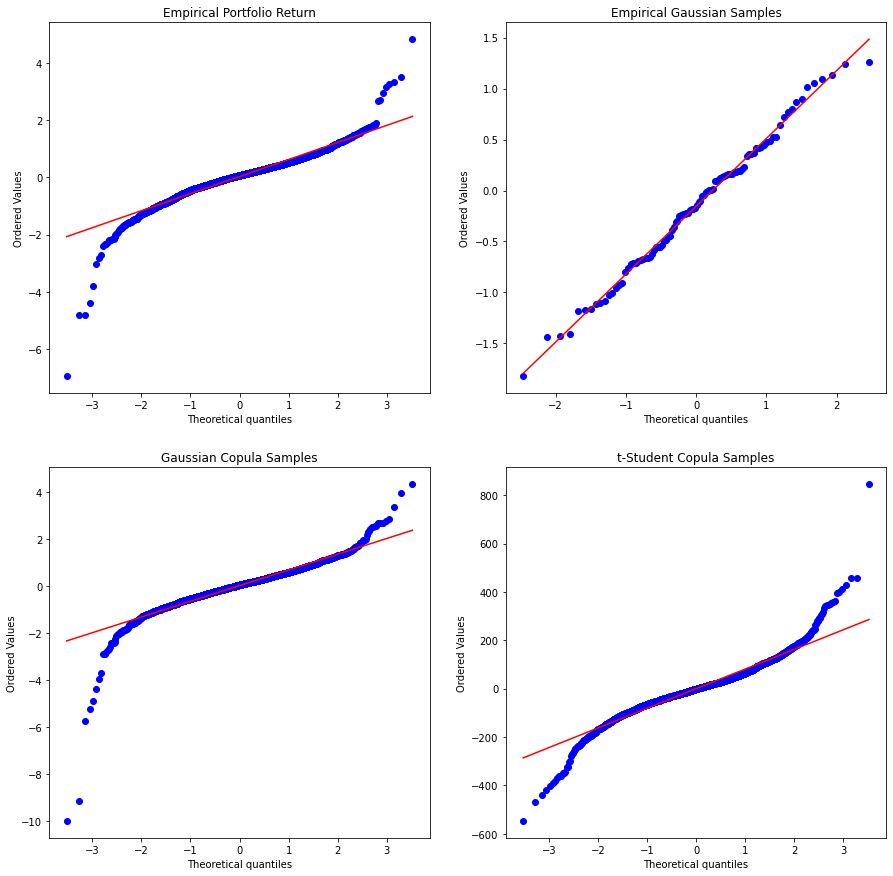

In [86]:
nsample = 100
fig, ax = plt.subplots(figsize=(15,15))

ax1 = plt.subplot(221)
x = daily_portfolio_returns_df['portfolio_ret']
res = sc.probplot(x, plot=plt)
ax1.set_title('Empirical Portfolio Return')

ax2 = plt.subplot(222)
x = portfolio_norm_returns_df['portfolio_ret']
res = sc.probplot(x, plot=plt)
ax2.set_title('Empirical Gaussian Samples')

ax3 = plt.subplot(223)
x = portfolio_returns_df['portfolio_ret']
res = sc.probplot(x, plot=plt)
ax3.set_title('Gaussian Copula Samples')

ax4 = plt.subplot(224)
x = portfolio_t_returns_df['portfolio_ret']
res = sc.probplot(x, plot=plt)
ax4.set_title('t-Student Copula Samples')

In [89]:
norm_portfolio_VaR = portfolio_norm_returns_df.quantile(0.05)['portfolio_ret']


In [90]:
norm_portfolio_VaR

-1.1770677915002001